In [1]:
import sys
sys.path.insert(0,'../src/')

from utils import *
from multiply_connected_pipe import *
from pipe_system import PipeSystem
from abstract_pipe import *
from multiply_connected_pipe import MultiplyConnectedPipeFromPipeSystem

from matplotlib import pyplot as plt
import numpy as np
import pickle

In [2]:
with open('../exp1/pipes_and_shifts.pickle','rb') as f:
    pipes, shifts = pickle.load(f)

bdr_pipe = BoundaryPipe([BoundaryLet(-5,0,0,1,-1),BoundaryLet(31,0,np.pi,1,1)])
real_pipes = [RealPipe(p,shift_x=shift[0],shift_y=shift[1]) for p,shift in zip(pipes,shifts)]

In [3]:
ps = PipeSystem(real_pipes,bdr_pipe)
global_pipe = MultiplyConnectedPipeFromPipeSystem(ps)
global_pipe.build(fmm=True,required_tol=1e-11)

/Users/haiy/pkg/fmm2d/python/fmm2dpy/fmm2d.py:894: ComplexWarning: Casting complex values to real discards the imaginary part
  out.pottarg,out.gradtarg,out.ier = lfmm.cfmm2d_t_d_g(eps,sources,dipstr,targets)


In [4]:
with open('global_pipe_fmm_solve.pickle','wb') as f:
    pickle.dump(global_pipe, f)

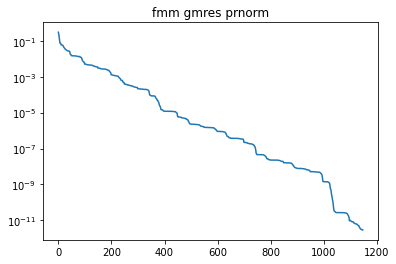

In [5]:
plt.title('fmm gmres prnorm')
for callback in global_pipe.callbacks:
    plt.semilogy(np.arange(len(callback.residuals)), callback.residuals)